# Weather

***

#### TASK 1: Create Directory Structure

Directories can be created from the command line using the `mkdir` command. The [MAN page for mkdir](https://linux.die.net/man/1/mkdir) explains its usage. [Bash](https://www.gnu.org/software/bash/) is a 'shell' (a.k.a. a command line interpreter) that executes the commands. The [Bash manual](https://www.gnu.org/software/bash/manual/bash.html) covers Bash features in detail.
    
To create the data directory the following command can be used:

`mkdir data`

Once that directory is created, we can navigate into that new directory with the following command:

`cd data`

Note `cd` is used to [change directory.](https://www.gnu.org/software/bash/manual/bash.html#index-cd)

Once inside the data directory we can then create two more directories using the following commands:

`mkdir weather`

`mkdir timestamps`


To save time, we can combine those commands into one succint command, as `mkdir` accepts multiple arguements:
    
`mkdir -p data/weather data/timestamps`

- https://unix.stackexchange.com/questions/338104/creating-multiple-nested-directories-with-one-command
    
Note the use of the `-p` flag (short for `--parents`) which tells Bash to create parent directories as required.

#### TASK 2: Timestamps

We can invoke the `date` command-line tool to timestamp files.

- https://www.gnu.org/software/coreutils/manual/html_node/date-invocation.html#date-invocation

From the root of the directory, navigate into the timestamps directory using the following command:

`cd data/timestamps`

The `date` command displays system time and date. The output from `date` command can be appended to a file. In computing terms to append means to "write more data to the end of a pre-existing file" (The American Heritage® Dictionary of the English Language, 5th Edition)

If the file does not exist, it is created automatically.

`date >> now.txt`

The '>>' operator pipes the output from `date` into a file called 'now.txt'

- https://www.gnu.org/software/bash/manual/bash.html#Appending-Redirected-Output

There are many optional arguements that can be used when invoking `date`:

- https://www.man7.org/linux/man-pages/man1/date.1.html

#### TASK 3: Formatting Timestamps

The output from `date` can be formatted by providing different option to the `date` command.

`date --help` shows where to get full documentation as well as a full list of FORMAT controls, a sample of which is shown below:

```
  %a   locale's abbreviated weekday name (e.g., Sun)
  %A   locale's full weekday name (e.g., Sunday)
  %b   locale's abbreviated month name (e.g., Jan)
  %B   locale's full month name (e.g., January)
  %c   locale's date and time (e.g., Thu Mar  3 23:05:25 2005)
  %C   century; like %Y, except omit last two digits (e.g., 20)
```

This site gives a good overview of how to combine optional arguements:

- https://www.howtogeek.com/410442/how-to-display-the-date-and-time-in-the-linux-terminal-and-use-it-in-bash-scripts/

The format string always begins with the plus sign `+`, followed by the option. Each option has a leading `%` sign:  
    
`date +%Y%m%d_%H%M%S`

The output is as follows:

```
guest@computer:~$ date +%Y%m%d_%H%M%S
20241103_153645
```

The above command is comprised of the following optional arguments. An underscore seperates the string for better readability:

```
%Y   year
%m   month (01..12)
%d   day of month (e.g., 01)
%H   hour (00..23)
%M   minute (00..59)
%S   second (00..60)
```

#### TASK 4: Create Timestamped Files

append to file:
    
    touch `date +%Y%m%d_%H%M%S.txt`

touch man page:

- https://www.man7.org/linux/man-pages/man1/touch.1.html

#### TASK 5: Download Today's Weather Data

wget 

- https://www.gnu.org/software/wget/

used command:

```
 wget -O weather.json https://prodapi.metweb.ie/observations/athenry/today
```

man page wget:

- https://man7.org/linux/man-pages/man1/wget.1.html

#### TASK 6: Timestamp the Data

used command:

```
wget -O `date +%Y%m%d_%H%M%S.json` https://prodapi.metweb.ie/observations/athenry/today
```

#### TASK 7: Write the Script

feeCodeCampe give a good crash course on how to create a bash script:

- https://www.freecodecamp.org/news/shell-scripting-crash-course-how-to-write-bash-scripts-in-linux/


```
touch weather.sh
nano weather.sh
paste in: 
    wget -O `date +%Y%m%d_%H%M%S.json` https://prodapi.metweb.ie/observations/athenry/today
Ctrl-O
Ctrl-X
chmod +x weather.sh
```

executed using:
    
    ./weather.sh


installed jq to pretty print json files in the console

- https://jqlang.github.io/jq/manual/

view pretty json:
    
    jq . weather.json

## PANDAS

***

Now to read in the weather json and do some plotting. Pandas has a built-in method for reading json files.

- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_json.html

In [2]:
import pandas as pd

# read in the json file
weather_df = pd.read_json("weather/20241001_195243.json")

# view dataframe (truncated)
weather_df

,name,temperature,symbol,weatherDescription,text,windSpeed,windGust,cardinalWindDirection,windDirection,humidity,rainfall,pressure,dayName,date,reportTime
0,Athenry,8,02n,Fair,"""Fair""",7,-,NW,315,96,0,1015,Tuesday,2024-01-10,00:00
1,Athenry,7,02n,Fair,"""Fair""",7,-,NW,315,97,0,1016,Tuesday,2024-01-10,01:00
2,Athenry,7,02n,Fair,"""Fair""",9,-,NW,315,97,0,1016,Tuesday,2024-01-10,02:00
3,Athenry,8,02n,Fair,"""Fair""",9,-,NW,315,97,0,1016,Tuesday,2024-01-10,03:00
4,Athenry,9,04n,Cloudy,"""Cloudy""",9,-,NW,315,97,0,1016,Tuesday,2024-01-10,04:00
5,Athenry,9,04n,Cloudy,"""Cloudy""",13,-,NW,315,97,0,1016,Tuesday,2024-01-10,05:00
6,Athenry,10,04n,Cloudy,"""Cloudy""",15,-,NW,315,97,0,1016,Tuesday,2024-01-10,06:00
7,Athenry,10,04n,Cloudy,"""Cloudy""",13,-,NW,315,96,0,1016,Tuesday,2024-01-10,07:00
8,Athenry,10,04d,Cloudy,"""Cloudy""",9,-,N,0,96,0,1017,Tuesday,2024-01-10,08:00
9,Athenry,11,04d,Cloudy,"""Cloudy""",9,-,N,0,95,0,1017,Tuesday,2024-01-10,09:00


In [6]:
# view headers 
weather_df.columns.tolist()

['name',
 'temperature',
 'symbol',
 'weatherDescription',
 'text',
 'windSpeed',
 'windGust',
 'cardinalWindDirection',
 'windDirection',
 'humidity',
 'rainfall',
 'pressure',
 'dayName',
 'date',
 'reportTime']

Now to do some plotting using [Matplotlib.](https://matplotlib.org/) Matplotlib is a popular data visualisation library which can be used to create a variety of different plots.

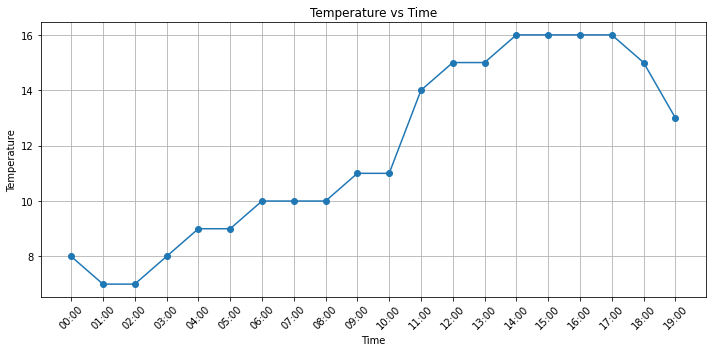

In [8]:
import matplotlib.pyplot as plt

# Specify the columns to plot
time_column = 'reportTime'   
temperature_column = 'temperature'

# Set up the canvas
fig, ax = plt.subplots(figsize=(10, 5))

# create line plot
ax.plot(weather_df[time_column], weather_df[temperature_column], marker='o', linestyle='-')

# Decorate the plot
ax.set_title('Temperature vs Time')
ax.set_xlabel('Time')
ax.set_ylabel('Temperature')
ax.tick_params(axis='x', rotation=45)
ax.grid()

plt.tight_layout()
